In [1]:
import tensorflow as tf

All of the computations in the process of linear regression will be performed using Tensorflow library.

In [2]:
import xlrd
import numpy as np
import matplotlib.pyplot as plt

A few more imports for file reading and graphical display purpose.

In [3]:
DATA_FILE = 'data/fire_theft.xls'
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
num_samples = sheet.nrows - 1

The above block is for data reading purpose. This will vary according to your usage.

In [4]:
W = tf.Variable(0.0, name="weights")
b = tf.Variable(0.0, name="bias")

We are using two variables as the weights and bias of the model. Initializing both of them to 0.

In [5]:
def inputs():
    X = tf.placeholder(tf.float32, name="X")
    Y = tf.placeholder(tf.float32, name="Y")
    return X,Y

We use the place holders to store the input X and the expected output Y.

In [6]:
def inference(X):
    return X * W + b

The inference function for the linear regression is W * x + b.

In [7]:
def loss(X, Y):
    Y_predicted = inference(X)
    return tf.squared_difference(Y, Y_predicted)

The loss is the most vital part of the model. It is measured as the squared difference of actual output and predicted output.

In [8]:
# The training function.
def train(loss):
    learning_rate = 0.0001
    return tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

We use the gradient descent optimizer to train our model by minimising the loss function.

In [9]:
num_epochs = 10

The number of epochs for training is set to 100.

In [13]:
with tf.Session() as sess:

    # Initializing the weights and bias
    sess.run(tf.global_variables_initializer())

    # Get the input tensors
    X, Y = inputs()

    # Return the train loss and create the train_op.
    train_loss = loss(X, Y)
    train_op = train(train_loss)

    #Training the model
    for epoch_num in range(num_epochs): # run 100 epochs
        for x, y in data:
          train_op = train(train_loss)

          # Session runs train_op to minimize loss
          loss_value,_ = sess.run([train_loss,train_op], feed_dict={X: x, Y: y})

        print('epoch %d, loss=%f' %(epoch_num, loss_value))

        # save the values of weight and bias
        wcoeff, bias = sess.run([W, b])

epoch 0, loss=94.583313
epoch 1, loss=76.986359
epoch 2, loss=74.769722
epoch 3, loss=73.968338
epoch 4, loss=73.308357
epoch 5, loss=72.666481
epoch 6, loss=72.030632
epoch 7, loss=71.399673
epoch 8, loss=70.773422
epoch 9, loss=70.151794


The above session runs the training of the model.

In [14]:
Input_values = data[:,0]
Labels = data[:,1]
Prediction_values = data[:,0] * wcoeff + bias

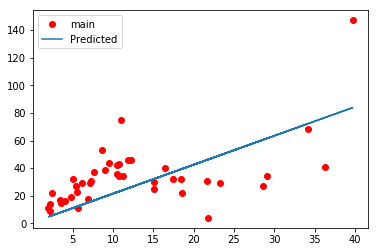

In [15]:
plt.plot(Input_values, Labels, 'ro', label='main')
plt.plot(Input_values, Prediction_values, label='Predicted')
plt.legend()